# 📊 Hypothesis Testing in Statistics (with Python)

Welcome to this comprehensive notebook on statistical hypothesis testing using Python. We'll explore essential concepts and perform statistical tests with practical examples and real-world scenarios.

## 📌 1. Introduction to Hypothesis Testing

### 🎯 Objective:
To determine whether a hypothesis about a population parameter (like the mean) is statistically significant based on sample data.

### 🔍 Key Concepts:
- **Null Hypothesis (H₀)**: Assumes no effect or no difference.
- **Alternative Hypothesis (H₁)**: What we want to prove—indicates an effect or difference.
- **Significance Level (α)**: Threshold probability for rejecting H₀. 
- **p-value**: The probability of obtaining a result at least as extreme as the observed one, assuming H₀ is true.

### 🧪 Statistical Hypothesis Testing Steps

### 🎯 Establishing Hypotheses (Claim → Scientific Formula)

- **H₀ (Null Hypothesis):** Claim "There is no change"
Example: The drug is ineffective
**H₀: μ = 0**

- **H₁ (Alternative Hypothesis):** Claim "There is change"
Example: The drug is effective
**H₁: μ > 0**

💡 **Note:** The claim defended by the researcher is **H₁**. The aim is to **refute** H₀.

### 📏 Test Statistic (Converting Data to Numbers)

**Purpose:** To measure how well the sample data fits or does not fit H₀.

The formula varies depending on the type of test used:

- For means: **z-test / t-test**
- For proportions: **z-test**
- For variances: **χ² (Chi-square test)**

### 📉 p-value (Extremity of Statistic)

**Definition:** It is the probability of seeing the test statistic or a more extreme value if H₀ is assumed to be true.

#### Calculation Methods:

- z-statistic → Standard normal distribution table / software
- t-statistic → t-distribution table / software

#### Example:

- z = 2.0
- **p = P(Z ≥ 2.0) = 0.0228** (right tail test)

### 🧾 α (Alpha - Significance Level)

**Definition:** It is the maximum error (risk) level accepted to reject H₀.

#### Common Values:

- **α = 0.05** → 5% margin of error
- **α = 0.01** → 1% margin of error

### ⚖️ Decision Rules

```text
if p-value < α → reject H₀ (statistically significant)
if p-value ≥ α → reject H₀ (insufficient evidence)

## 🚨 2. Type I and Type II Errors

### ❗ Type I Error (False Positive):
- Rejecting a true null hypothesis.
- Example: Declaring a drug effective when it is not.

### ❓ Type II Error (False Negative):
- Failing to reject a false null hypothesis.
- Example: Concluding a drug is ineffective when it actually works.

| Type        | Description                       | Consequence                           |
|-------------|-----------------------------------|----------------------------------------|
| Type I (α)  | False alarm                        | Unnecessary action or cost            |
| Type II (β) | Missed detection                   | Missed opportunity or risk remains    |

## 🧭 3. One-Tailed vs. Two-Tailed Tests

### ▶️ One-Tailed Test:
Tests whether the parameter is either greater **or** less than a value. Use when direction matters (e.g., H₁: μ > μ₀).

### 🔁 Two-Tailed Test:
Tests whether the parameter is **not equal** to a value. Use when any deviation matters (e.g., H₁: μ ≠ μ₀).

## 🎯 Scenario Example: Lead Level in Seawater

You're testing whether pollution in a coastal region exceeds acceptable limits:
- Population Mean (μ₀) = 10 ppm
- Sample Mean (x̄) = 10.5 ppm
- Population SD (σ) = 1.5 ppm
- Sample Size (n) = 40
- α = 0.05

In [2]:
### Step-by-Step (Z-Test: Population std known, n > 30):

import scipy.stats as stats
import numpy as np

mu_0 = 10      # hypothesized population mean
x_bar = 10.5   # sample mean
sigma = 1.5    # population std deviation
n = 40

z = (x_bar - mu_0) / (sigma / np.sqrt(n))
p_value = 1 - stats.norm.cdf(z)  # right-tail test

print(f"Z Score: {z:.3f}")
print(f"P-Value: {p_value:.4f}")

# ✅ If `p-value < α`, reject H₀ → Pollution is significantly higher.

Z Score: 2.108
P-Value: 0.0175


## 🧪 Apply All Hypothesis Test Methods

In [3]:
# Simulate regions:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
clean = np.random.normal(10, 1.5, 40)
polluted = np.random.normal(10.5, 1.5, 40)
region_c = np.random.normal(11, 1.5, 40)

In [4]:
# DataFrame for ANOVA
df = pd.DataFrame({"Region": ["Clean"]*40 + ["Polluted"]*40 + ["Coastal"]*40,
                   "LeadLevel": np.concatenate([clean, polluted, region_c])})

In [5]:
df

,Region,LeadLevel
0,Clean,10.745071
1,Clean,9.792604
2,Clean,10.971533
3,Clean,12.284545
4,Clean,9.648770
...,...,...
115,Coastal,11.452321
116,Coastal,10.947932
117,Coastal,9.246983
118,Coastal,12.714234


### 📊 Boxplots and Distributions

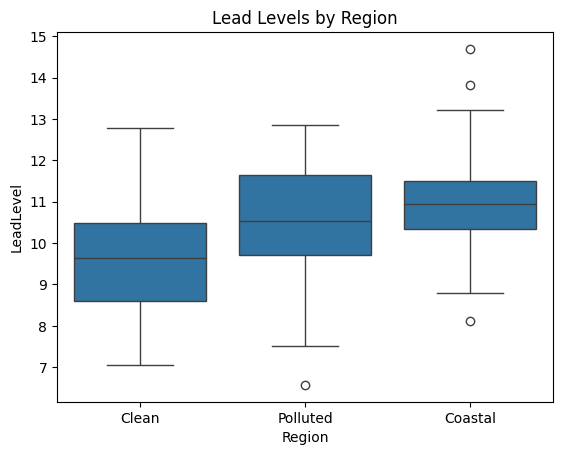

In [10]:
# Boxplot for visual comparison
sns.boxplot(x="Region", y="LeadLevel", data=df)
plt.title("Lead Levels by Region")
plt.show()

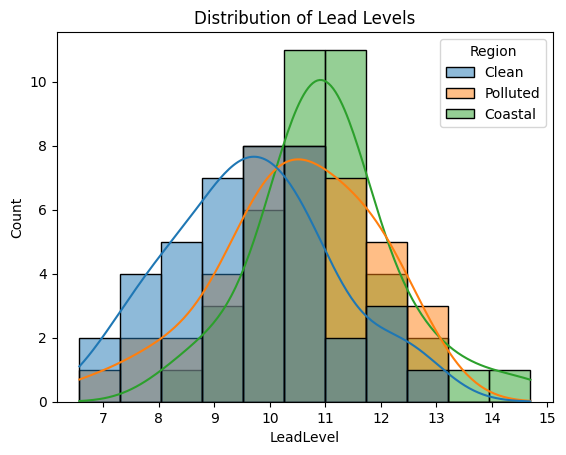

In [11]:
# Histogram and KDE plot
sns.histplot(data=df, x="LeadLevel", hue="Region", kde=True)
plt.title("Distribution of Lead Levels")
plt.show()

### 1️⃣ Z-Test

In [14]:
z = (np.mean(polluted) - mu_0) / (sigma / np.sqrt(len(polluted)))
p_val = 1 - stats.norm.cdf(z)
print("Z-Test: Z=", round(z, 3), ", p=", round(p_val, 4))

Z-Test: Z= 1.924 , p= 0.0271


### 2️⃣ Independent T-Test

In [15]:
t_stat, p_val = stats.ttest_ind(clean, polluted)
print("T-Test: T=", round(t_stat, 3), ", p=", round(p_val, 4))

T-Test: T= -2.439 , p= 0.017


### 3️⃣ Paired T-Test (Before/After)

In [16]:
before = np.random.normal(10.5, 1.5, 30)
after = before - np.random.normal(0.5, 0.3, 30)
t_stat, p_val = stats.ttest_rel(before, after)
print("Paired T-Test: T=", round(t_stat, 3), ", p=", round(p_val, 4))

Paired T-Test: T= 11.248 , p= 0.0


### 4️⃣ One-Way ANOVA

In [17]:
f_stat, p_val = stats.f_oneway(clean, polluted, region_c)
print("ANOVA: F=", round(f_stat, 3), ", p=", round(p_val, 4))

ANOVA: F= 9.405 , p= 0.0002


### 5️⃣ Chi-Square Test

In [18]:
obs = np.array([[30, 10], [20, 20]])
chi2, p_val, dof, exp = stats.chi2_contingency(obs)
print("Chi-Square: Chi2=", round(chi2, 3), ", p=", round(p_val, 4))

Chi-Square: Chi2= 4.32 , p= 0.0377


### 📈 Realistic Report Summary for Environment:

- Z-Test showed p < 0.05 → Lead levels in the polluted area are significantly higher.
- ANOVA confirmed differences across all regions.
- Visualization supports the increase trend in lead pollution.

## 🧠 Psychology Scenario: Cognitive Therapy Effectiveness

You're testing whether cognitive therapy reduces anxiety scores significantly.
- Data: 30 patients, before and after therapy.

In [19]:
before = np.random.normal(25, 5, 30)
after = before - np.random.normal(5, 2, 30)

In [20]:
# Paired T-Test
from scipy.stats import ttest_rel
stat, p = ttest_rel(before, after)
print("Paired T-Test: p=", round(p, 4))

Paired T-Test: p= 0.0


✅ Interpretation: If `p < 0.05`, therapy is effective in reducing anxiety.

### 📊 Visualize:

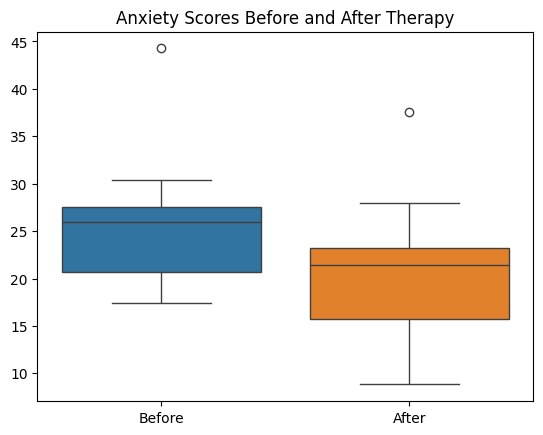

In [22]:
sns.boxplot(data=[before, after])
plt.xticks([0, 1], ['Before', 'After'])
plt.title("Anxiety Scores Before and After Therapy")
plt.show()

### 📈 Realistic Report Summary for Therapy:
- The paired T-Test gave a p-value well below 0.05.
- Therapy appears statistically effective in reducing anxiety.
- Visualization shows a clear drop in scores post-therapy.

## 📈 Marketing Scenario: Conversion Rates A/B Testing

You're comparing two web page versions:
- Version A: 100 users, 25 converted
- Version B: 100 users, 35 converted

In [23]:
obs = np.array([[25, 75], [35, 65]])
chi2, p, dof, exp = stats.chi2_contingency(obs)
print("Chi-Square Test for A/B: p=", round(p, 4))

Chi-Square Test for A/B: p= 0.1649


✅ Interpretation: If `p < 0.05`, Version B has significantly better conversion rate.

### 📊 Visualize:

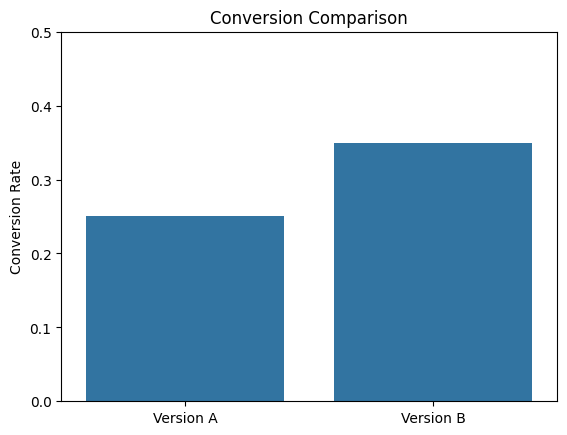

In [24]:
sns.barplot(x=['Version A', 'Version B'], y=[25/100, 35/100])
plt.ylabel("Conversion Rate")
plt.title("Conversion Comparison")
plt.ylim(0, 0.5)
plt.show()

## ✅ Non-Parametric Alternatives & Assumption Checks

### 6️⃣ Normality Check

In [25]:
from scipy.stats import shapiro

stat, p = shapiro(polluted)
print("Shapiro-Wilk Test: p=", round(p, 4))

Shapiro-Wilk Test: p= 0.3709


### 7️⃣ Variance Homogeneity (Levene’s Test)

In [26]:
from scipy.stats import levene

stat, p = levene(clean, polluted)
print("Levene’s Test: p=", round(p, 4))

Levene’s Test: p= 0.9633


### 8️⃣ Mann-Whitney U Test

In [27]:
from scipy.stats import mannwhitneyu

u, p = mannwhitneyu(clean, polluted)
print("Mann-Whitney U Test: p=", round(p, 4))

Mann-Whitney U Test: p= 0.0112


### 9️⃣ Wilcoxon Signed-Rank Test

In [28]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(before - after)
print("Wilcoxon Test: p=", round(p, 4))

Wilcoxon Test: p= 0.0


### 🔟 Kruskal-Wallis Test (Non-parametric ANOVA)

In [29]:
from scipy.stats import kruskal

stat, p = kruskal(clean, polluted, region_c)
print("Kruskal-Wallis Test: p=", round(p, 4))

Kruskal-Wallis Test: p= 0.0002


## 📌 Summary of All Tests

| Test                | Used For                              | Assumptions                          |
|---------------------|----------------------------------------|--------------------------------------|
| Z-Test              | Large n, known std                     | Normality, known σ                   |
| Independent T-Test  | Two group means                        | Normality, equal variances           |
| Paired T-Test       | Before-after in same subjects          | Normality of differences             |
| ANOVA               | 3+ groups                              | Normality, equal variances           |
| Chi-Square Test     | Categorical variables                  | Expected frequency > 5               |
| Mann-Whitney        | Non-parametric for 2 indep. groups     | Independent, ordinal/continuous      |
| Wilcoxon            | Non-parametric for paired data         | Symmetry of difference distribution  |
| Kruskal-Wallis      | Non-parametric for 3+ groups           | Independent samples                  |